In [1]:
import sklearn as sl
import pandas as pd
!pip install pyreadr
import pyreadr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.9/440.9 kB 4.7 MB/s eta 0:00:00


In [2]:
from google.colab import files
files.upload()

Saving BPM_exp_data.csv to BPM_exp_data.csv


{'BPM_exp_data.csv': b'"vital_status","survival_time","risk","LINC01626","MYO16-AS2","LINC01650","LINC02529","LINC01810","FAM197Y6","LINC02113","LINC01218","XIRP2-AS1","LINC01742"\r\n0,685,"Low_risk",0,0,0,0,0,0,0,0,0,0\r\n1,173,"Low_risk",0,0,0,0,0,0,0,0,0,1.23023415918905\r\n1,862,"Low_risk",0,0,0,0,0,0,0.658332924326924,0,0,0\r\n0,754,"Low_risk",0,0,0,0,0,0,0,0,0,0\r\n0,1030,"Low_risk",0,0,0,0.924787743977985,0,0,0,0,0,0\r\n0,1559,"Low_risk",0,0,0,0,0,0,0,0,0,0\r\n1,197,"Low_risk",0,0,0,0,0,0,0,0,0,0\r\n0,897,"Low_risk",0,1.18204045391952,0,0,0,0,0,0,0,0\r\n1,321,"Low_risk",0,0.886430370363932,0,0,0,0,0,0,0,0\r\n0,695,"Low_risk",0,0,0,0,0,0,0,0,0,0\r\n0,539,"Low_risk",0,0,0,0,0,0,0,0,0,0\r\n0,1508,"Low_risk",0,0,0,0,0,0,0,0,0,0\r\n1,129,"Low_risk",0,0.828868733569817,0,0,0,0,0,0,0,0\r\n0,549,"Low_risk",0,0,0,0,0,0,0,0,0,0\r\n0,1000,"Low_risk",0,0,0,0,0,0,0,0,0,0\r\n1,631,"Low_risk",0,0,0,0,0,0,0,0,0,0\r\n0,1036,"Low_risk",0,0,0,0,0,0,0,0,0,2.18617035385946\r\n1,144,"Low_risk",0,0,0,

In [13]:
from google.colab import files
files.upload()

Saving GPM_exp_data.csv to GPM_exp_data (1).csv


{'GPM_exp_data (1).csv': b'"vital_status","survival_time","risk","LINC01627","LINC00424","RPS6KA2-AS1","LINC01307","GPC5-IT1","LINC01685","LINC02325","LINC02368","LINC00596","LINC01570"\r\n0,685,"Low_risk",0,0,0,2.56411334667588,0,0,3.41881779556785,1.70940889778392,0,0\r\n1,173,"Low_risk",0,0,0,0,0,0,0,0,0,0\r\n1,862,"Low_risk",0,0,0,0,0,0,0.658332924326924,0,0,0\r\n0,754,"Low_risk",2.58125176534197,0,0,0,0,0,5.16250353068393,0,0,0\r\n0,1030,"Low_risk",0,0,0,0,0,0,4.62393871988993,0,0,0\r\n0,1559,"Low_risk",0,0,0.58910814073529,0,0,0.58910814073529,11.1930546739705,0,0,0.58910814073529\r\n1,197,"Low_risk",0,0,0,0,0,0,0,0,0,0\r\n0,897,"Low_risk",0,0,0,0,0,0,3.54612136175855,1.18204045391952,0,0\r\n1,321,"Low_risk",0,0,0,0,0,0,0.886430370363932,0,0,0\r\n0,695,"Low_risk",0,0,0,0,0,0,2.32801170881116,0,1.16400585440558,0\r\n0,539,"Low_risk",0,1.0215217408246,1.0215217408246,0,0,0,1.0215217408246,0,0,0\r\n0,1508,"Low_risk",0,0,0,0,0,0,1.85909356686364,0,0,0\r\n1,129,"Low_risk",0,0,0,0,0,0,

**For Good Prognostic Markers**

In [172]:
import pandas as pd
data = pd.read_csv('/content/GPM_exp_data.csv')

In [173]:
data['survival_time_years'] = data['survival_time'] / 365.25

In [174]:
column = ["vital_status","survival_time", "risk"]
data = data.drop(column, axis=1)

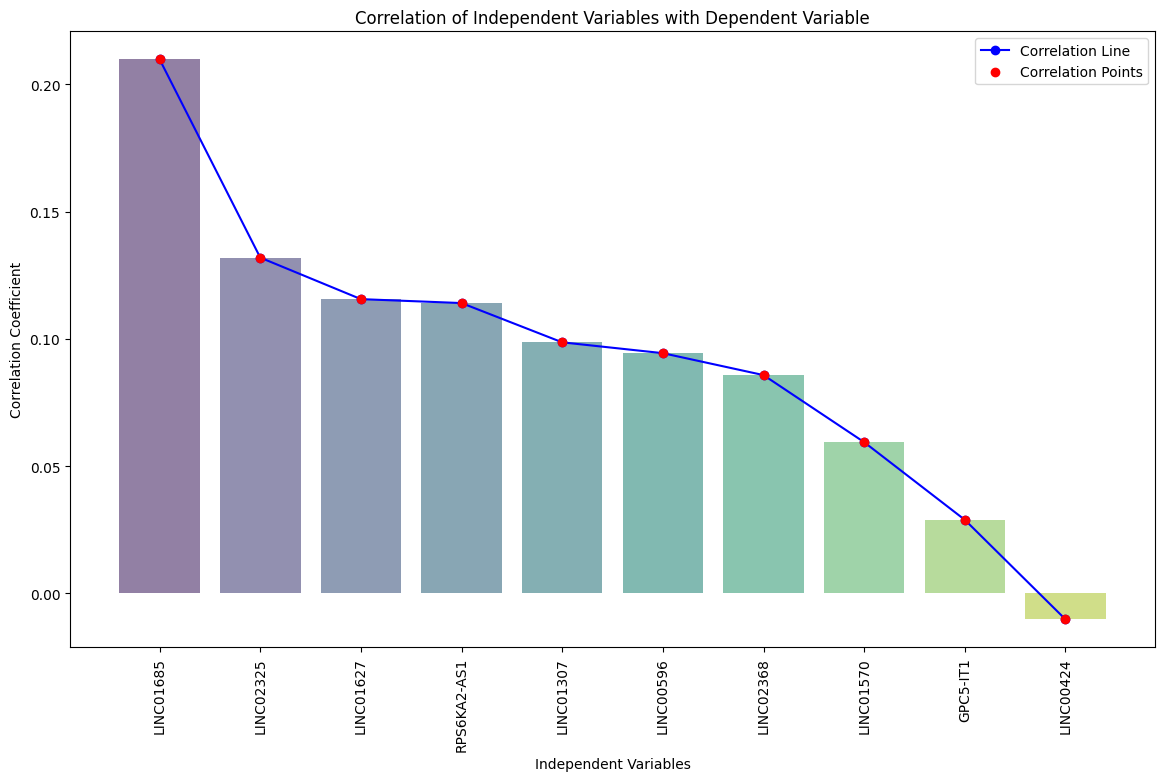

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

dependent_var = 'survival_time_years'

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Extract the correlations of the dependent variable with all other variables
correlations = correlation_matrix[dependent_var].drop(dependent_var)

# Sort the correlations
correlations = correlations.sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(14, 8))

# Bar plot
sns.barplot(x=correlations.index, y=correlations.values, palette="viridis", alpha=0.6)

# Line plot
plt.plot(correlations.index, correlations.values, marker='o', color='b', label='Correlation Line')

# Scatter plot
plt.scatter(correlations.index, correlations.values, color='r', label='Correlation Points', zorder=5)

plt.title('Correlation of Independent Variables with Dependent Variable')
plt.xlabel('Independent Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.legend()
plt.show()

In [176]:
X = data.drop('survival_time_years', axis = 1)
y = data['survival_time_years']

In [177]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [196]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [197]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)
predictions = regressor1.predict(X_test)
print(r2_score(y_test, predictions))
print(mean_squared_error(y_test, predictions))


0.06206470139180709
6.021123024634571


In [198]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regressor2 = Ridge(alpha=1.0)
regressor2.fit(X_train, y_train)
predictions2 = regressor2.predict(X_test)
print(r2_score(y_test, predictions2))
print(mean_squared_error(y_test, predictions2))

0.06357250813776305
6.011443583069417


In [199]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'max_iter': [1000, 2000, 3000],
    'tol': [0.0001, 0.001, 0.01]
}

# Initialize Lasso model
lasso = Ridge()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict using the best model
predictions = best_model.predict(X_test)

# Evaluate the model
print(f"Best Parameters: {best_params}")
print(f"R^2 Score: {r2_score(y_test, predictions)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, predictions)}")


Best Parameters: {'alpha': 100, 'fit_intercept': True, 'max_iter': 1000, 'tol': 0.0001}
R^2 Score: 0.07274896576005929
Mean Squared Error: 5.952534849859161


In [192]:
from lazypredict.Supervised import LazyRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize LazyRegressor
regressor = LazyRegressor()

# Fit and evaluate models
models = regressor.fit(X_train, X_test, y_train, y_test)

# Print out model performance metrics
print(models)


100%|██████████| 42/42 [00:04<00:00,  9.07it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 222
[LightGBM] [Info] Number of data points in the train set: 399, number of used features: 10
[LightGBM] [Info] Start training from score 2.491527
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

**For Bad Prognostic Markers**

In [200]:
import pandas as pd
data = pd.read_csv('/content/BPM_exp_data.csv')

In [201]:
data['survival_time_years'] = data['survival_time'] / 365.25

In [202]:
column = ["vital_status","survival_time", "risk"]
data = data.drop(column, axis=1)

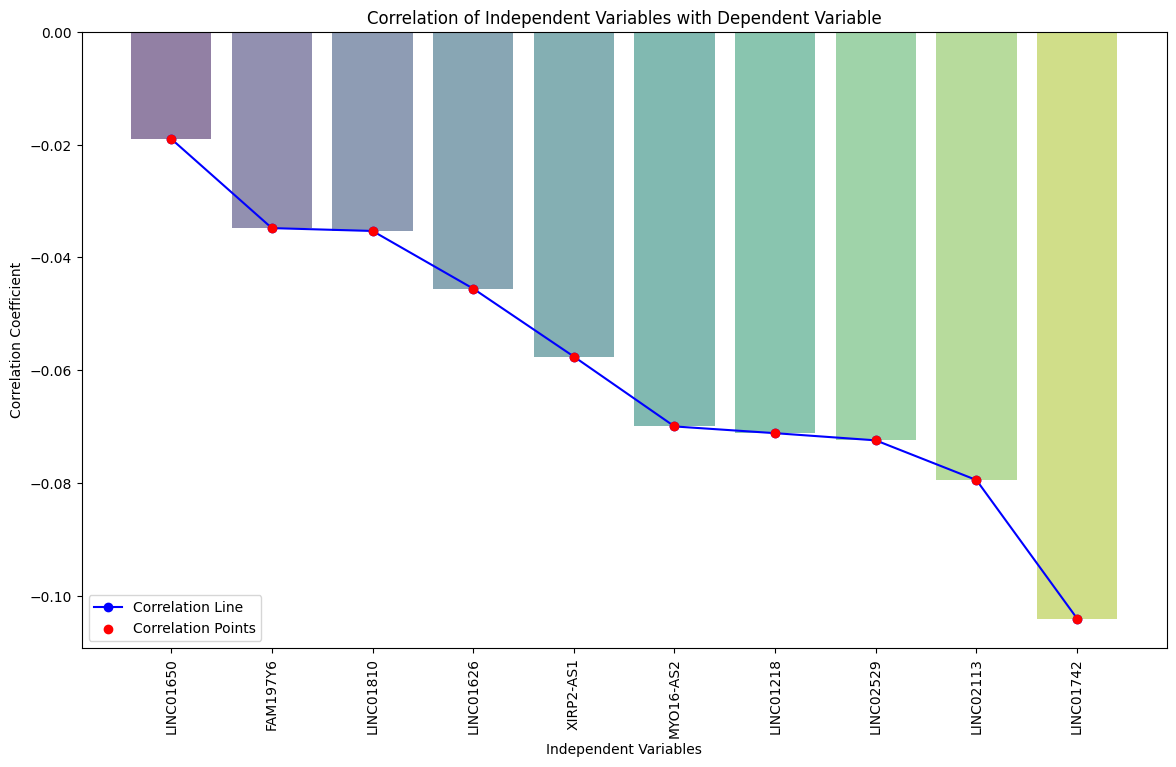

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

dependent_var = 'survival_time_years'

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Extract the correlations of the dependent variable with all other variables
correlations = correlation_matrix[dependent_var].drop(dependent_var)

# Sort the correlations
correlations = correlations.sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(14, 8))

# Bar plot
sns.barplot(x=correlations.index, y=correlations.values, palette="viridis", alpha=0.6)

# Line plot
plt.plot(correlations.index, correlations.values, marker='o', color='b', label='Correlation Line')

# Scatter plot
plt.scatter(correlations.index, correlations.values, color='r', label='Correlation Points', zorder=5)

plt.title('Correlation of Independent Variables with Dependent Variable')
plt.xlabel('Independent Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.legend()
plt.show()

In [204]:
X = data.drop('survival_time_years', axis = 1)
y = data['survival_time_years']

In [205]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [207]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)
predictions = regressor1.predict(X_test)
print(r2_score(y_test, predictions))
print(mean_squared_error(y_test, predictions))


0.032035290056151244
6.116344676544208


In [208]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
regressor1 = RandomForestRegressor(random_state = 2)
regressor1.fit(X_train, y_train)
predictions = regressor1.predict(X_test)
print(r2_score(y_test, predictions))
print(mean_squared_error(y_test, predictions))


0.04079933356822818
7.207829008015915


In [209]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
regressor2 = Ridge(alpha=1.0)
regressor2.fit(X_train, y_train)
predictions2 = regressor2.predict(X_test)
print(r2_score(y_test, predictions2))
print(mean_squared_error(y_test, predictions2))

0.04244143117598198
7.35706175458348


In [210]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'max_iter': [1000, 2000, 3000],
    'tol': [0.0001, 0.001, 0.01]
}

# Initialize Lasso model
lasso = Ridge()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict using the best model
predictions = best_model.predict(X_test)

# Evaluate the model
print(f"Best Parameters: {best_params}")
print(f"R^2 Score: {r2_score(y_test, predictions)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, predictions)}")


Best Parameters: {'alpha': 10, 'fit_intercept': True, 'max_iter': 1000, 'tol': 0.0001}
R^2 Score: 0.04262470450130784
Mean Squared Error: 7.355653638969156


In [155]:
pip install lazypredict

In [171]:
from lazypredict.Supervised import LazyRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize LazyRegressor
regressor = LazyRegressor()

# Fit and evaluate models
models = regressor.fit(X_train, X_test, y_train, y_test)

# Print out model performance metrics
print(models)


100%|██████████| 42/42 [00:04<00:00,  8.42it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25
[LightGBM] [Info] Number of data points in the train set: 399, number of used features: 2
[LightGBM] [Info] Start training from score 2.487355
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf